# DS Final Project

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

dataset: https://www.baseball-reference.com/leagues/majors/2024-batting-leaders.shtml 

In [4]:
# direct to folder with all years of player data
player_path = '/Users/mayaellis/Desktop/neu/fall 24/ds2500/ds_baseball'
os.chdir(player_path)
FILES = os.listdir(player_path)
# sort in order of years (oldest first)
FILES.sort()

In [6]:
dataframes = []
for filename in FILES:
    # read files into dfs, account for encoding
    single_df = pd.read_csv(filename, encoding='ISO-8859-1')
    # name df columns according to year in file name
    year = filename.split('_')[-1].split('.')[0]
    single_df.columns = [f"{col}_{year}" for col in single_df.columns]
    dataframes.append(single_df)
# combine all dfs
df = pd.concat(dataframes, axis=1)
df.head()

,Unnamed: 0_Store,Rk_2014,Player_2014,Age_2014,Team_2014,Lg_2014,WAR_2014,G_2014,PA_2014,AB_2014,...,Rbat+_2024,TB_2024,GIDP_2024,HBP_2024,SH_2024,SF_2024,IBB_2024,Pos_2024,Awards_2024,Player-additional\_2024
0,NaN,1.0,Ian Kinsler,32.0,DET,AL,5.1,161.0,726.0,684.0,...,134.0,330.0,6.0,6.0,1.0,3.0,1.0,*87,AS,duranja01\
1,NaN,2.0,Nick Markakis*,30.0,BAL,AL,1.9,155.0,710.0,642.0,...,190.0,411.0,7.0,6.0,0.0,5.0,10.0,*D,AS,ohtansh01\
2,NaN,3.0,Matt Carpenter*,28.0,STL,NL,2.9,158.0,709.0,595.0,...,157.0,333.0,2.0,7.0,0.0,4.0,1.0,*6/D,AS,hendegu01\
3,NaN,4.0,Freddie Freeman*,24.0,ATL,NL,3.0,162.0,708.0,607.0,...,100.0,254.0,9.0,3.0,0.0,1.0,2.0,*4,AS,semiema01\
4,NaN,5.0,Hunter Pence,31.0,SFG,NL,4.0,162.0,708.0,650.0,...,179.0,328.0,10.0,4.0,0.0,4.0,2.0,*9/7DH,AS,sotoju01\


In [8]:
years = []
# iterate through files, add years from each filename to list of years
for filename in FILES:
    year = filename.split('_')[-1].split('.')[0]
    years.append(year)
# remove unwanted value
years.remove('Store')
# drop value if player had less than 200 PAs in the season
for year in years:
    df.drop(df[df[f'PA_{year}'] < 200].index, inplace = True)

Text(0.5, 1.0, 'Avg K percentage from 2014-2024 (excluding 2020)')

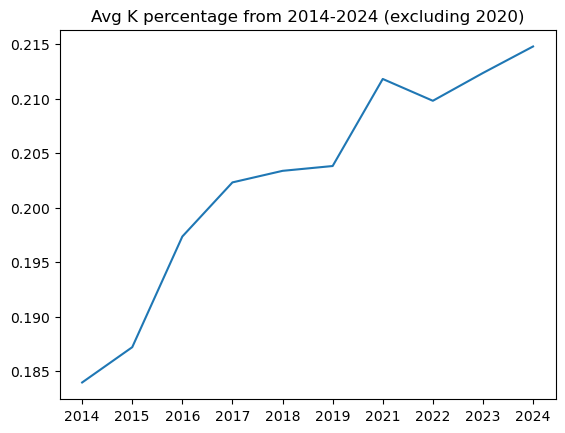

In [10]:
def calc_avg_so(year):
    '''calculates average strikeout percentage for a given year'''
    avg_so = df[f'SO_{year}'].sum()/df[f'PA_{year}'].sum()
    return avg_so

avg_sos = []
# calculate average strikeout pct for each year in df
for year in years:
    avg_so = calc_avg_so(year)
    avg_sos.append(avg_so)
avg_sos
# plot each year's avg so pct
plt.plot(years, avg_sos)
plt.title('Avg K percentage from 2014-2024 (excluding 2020)')

Text(0.5, 1.0, 'Avg BB percentage from 2014-2024 (excluding 2020)')

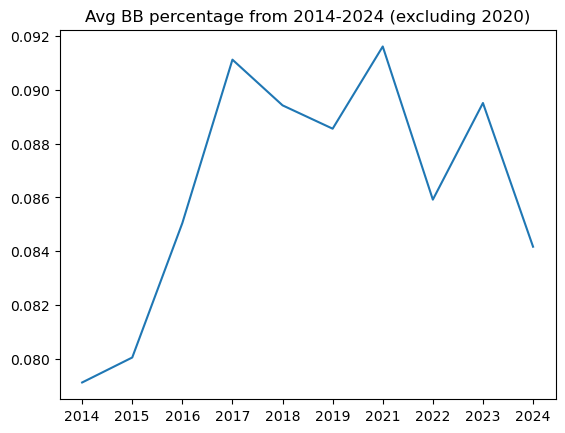

In [12]:
def calc_avg_bb(year):
    '''calculates average walk percentage for a given year'''
    avg_bb_rate = df[f'BB_{year}'].sum()/df[f'PA_{year}'].sum()
    return avg_bb_rate

avg_bb_rates = []
# calculate average walk pct for each year in df
for year in years:
    avg_bb = calc_avg_bb(year)
    avg_bb_rates.append(avg_bb)
avg_bb_rates
# plot avg bb pct for each year
plt.plot(years, avg_bb_rates)
plt.title('Avg BB percentage from 2014-2024 (excluding 2020)')

Text(0.5, 1.0, 'Avg HR percentage from 2014-2024 (excluding 2020)')

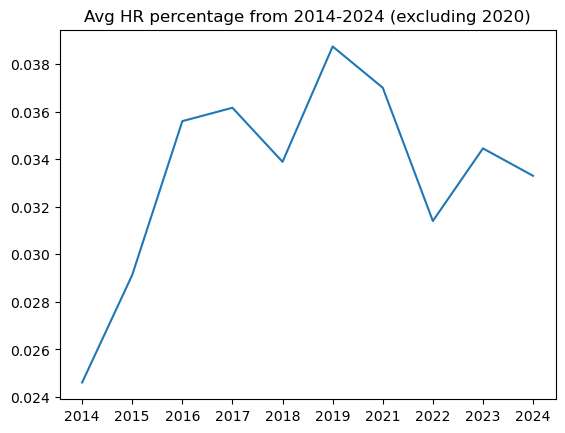

In [14]:
def calc_avg_hr(year):
    '''calculates average home run percentage for a given year'''
    avg_hr_rate = df[f'HR_{year}'].sum()/df[f'PA_{year}'].sum()
    return avg_hr_rate

avg_hr_rates = []
# calculate average home run percentage for each year in df
for year in years:
    avg_hr = calc_avg_hr(year)
    avg_hr_rates.append(avg_hr)
avg_hr_rates
# plot avg hr pct for each year
plt.plot(years, avg_hr_rates)
plt.title('Avg HR percentage from 2014-2024 (excluding 2020)')

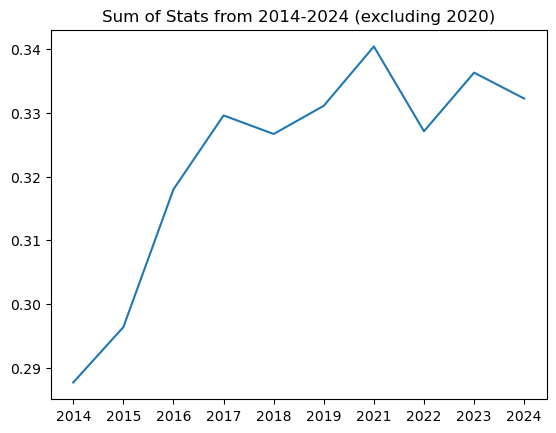

In [36]:
sum_stats = []
# calculate the sum of the average hr pct, strikeout pct, and bb pct for each year
for year in years:
    stats = calc_avg_hr(year) + calc_avg_so(year) + calc_avg_bb(year)
    sum_stats.append(stats)
# plot stats
plt.plot(years, sum_stats)
plt.title('Sum of Stats from 2014-2024 (excluding 2020)')
plt.show()

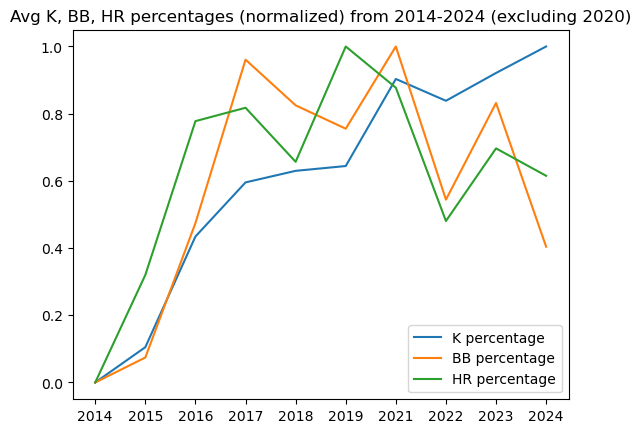

In [18]:
def normalize(lst):
    '''normalize values based on max and min in list'''
    # find max and min values in list
    numeric_lst = []
    for item in lst:
       numeric_lst.append(float(item))
    min_val = min(numeric_lst)
    max_val = max(numeric_lst)
    # create new list of normalized values
    normalized_lst = [(item - min_val)/(max_val - min_val) for item in numeric_lst]
    return normalized_lst
# normalize avg so, bb, and hr pcts
norm_sos = normalize(avg_sos)
norm_bb = normalize(avg_bb_rates)
norm_hr = normalize(avg_hr_rates)
# plot normalized pcts
plt.plot(years, norm_sos, label='K percentage')
plt.plot(years, norm_bb, label='BB percentage')
plt.plot(years, norm_hr, label='HR percentage')
plt.title('Avg K, BB, HR percentages (normalized) from 2014-2024 (excluding 2020)')
plt.legend()
plt.show()

In [20]:
def so_col(year):
    '''adds a column to the df containing the strikeout pct for each player'''
    sos = []
    # iterate through lenght of PA col and calculate so pct for each value
    for i in range(len(df[f'PA_{year}'])):
        so_pct = df.iloc[i][f'SO_{year}']/df.iloc[i][f'PA_{year}']
        sos.append(so_pct)
    # create new column
    df[f'SO_pct_{year}'] = sos
    
for year in years:
    so_col(year)

def bb_col(year):
    '''adds a column to the df containing the walk pct for each player'''
    bbs = []
    # iterate through lenght of PA col and calculate bb pct for each value
    for i in range(len(df[f'PA_{year}'])):
        bb_pct = df.iloc[i][f'BB_{year}']/df.iloc[i][f'PA_{year}']
        bbs.append(bb_pct)
    # create new column
    df[f'BB_pct_{year}'] = bbs
    
for year in years:
    bb_col(year)

def hr_col(year):
    '''adds a column to the df containing the homerun pct for each player'''
    hrs = []
    # iterate through lenght of PA col and calculate hr pct for each value
    for i in range(len(df[f'PA_{year}'])):
        hr_pct = df.iloc[i][f'HR_{year}']/df.iloc[i][f'PA_{year}']
        hrs.append(hr_pct)
    # create new column
    df[f'HR_pct_{year}'] = hrs
    
for year in years:
    hr_col(year)

df['BB_pct_2014']

0      0.039945
1      0.087324
2      0.133992
3      0.127119
4      0.073446
         ...   
371    0.091667
375    0.033755
380    0.064103
393    0.045045
409    0.004975
Name: BB_pct_2014, Length: 189, dtype: float64

In [21]:
# calculate pca component loadings to determine which factors have more weight in pca components
loadings_lst = []
# iterate through years and load x values as so, bb, and hr pcts
for year in years:
    X = df[[f'SO_pct_{year}', f'BB_pct_{year}', f'HR_pct_{year}']].values
    # set pca
    pca = PCA(n_components=2, random_state=42)
    # fit using x variables
    pca.fit(X)
    # find loadings
    loadings = pca.components_
    loadings_lst.append(loadings)
loadings_lst

[array([[ 0.99601252,  0.0266077 ,  0.08515333],
        [-0.03656804,  0.99238313,  0.11763713]]),
 array([[ 0.9834104 ,  0.13363462,  0.12266122],
        [-0.15451347,  0.97135858,  0.18052174]]),
 array([[ 0.99264145,  0.0937635 ,  0.07662476],
        [-0.10192574,  0.98861776,  0.11066196]]),
 array([[ 0.98618407,  0.11946202,  0.11475979],
        [-0.13449407,  0.98185543,  0.13368345]]),
 array([[ 0.98558291,  0.14658408,  0.08449515],
        [-0.15688397,  0.97875868,  0.13198055]]),
 array([[ 0.98486659,  0.1444802 ,  0.09572502],
        [-0.15784666,  0.97582392,  0.15116912]]),
 array([[ 0.97883889,  0.15423379,  0.13448552],
        [-0.16957244,  0.97922418,  0.11119887]]),
 array([[ 0.99685731, -0.02806051,  0.07408183],
        [ 0.01496826,  0.98503662,  0.17169394]]),
 array([[-0.9938649 , -0.03368038, -0.10534799],
        [-0.05463185,  0.97768875,  0.20283014]]),
 array([[-0.98975903, -0.10992308, -0.09107132],
        [-0.12430618,  0.97734598,  0.17129744]])]

In [24]:
# perform pca on each year's so, bb, and hr pcts
reduced_datas = []
for year in years:
    # set x variables
    X = df[[f'SO_pct_{year}', f'BB_pct_{year}', f'HR_pct_{year}']].values
    pca = PCA(n_components=2, random_state=42)
    # fit transform using x variables
    reduced_data = pca.fit_transform(X)
    reduced_datas.append(reduced_data)
reduced_datas

[array([[-8.05691754e-02, -3.48049754e-02],
        [-7.01668237e-02,  1.14310091e-02],
        [-3.15472007e-02,  5.53522161e-02],
        [ 1.75253710e-02,  4.84309105e-02],
        [-4.76413972e-03, -3.72553623e-03],
        [-1.15143824e-01, -2.42661000e-02],
        [-4.15427331e-03,  4.88588356e-02],
        [ 7.54255028e-02,  4.00757174e-02],
        [ 2.07775959e-03,  4.33653505e-03],
        [ 7.59785781e-04,  3.33670839e-02],
        [-8.49882826e-02, -3.67874457e-03],
        [-4.19111026e-02,  1.82844227e-02],
        [-5.03849202e-02, -1.13606562e-02],
        [-1.64472601e-02,  1.17504227e-02],
        [-3.54675690e-02,  9.10036802e-03],
        [ 6.59171178e-03, -4.77031464e-02],
        [ 2.08410452e-02,  6.67133235e-03],
        [-1.04931505e-01,  3.56720184e-03],
        [-2.66742293e-02, -7.29320263e-03],
        [-4.13911951e-02,  8.10354384e-02],
        [-9.24611382e-02, -1.61862079e-03],
        [-8.59261890e-02,  1.65468706e-02],
        [ 2.35967294e-02,  2.434

/Users/mayaellis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayaellis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayaellis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayaellis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

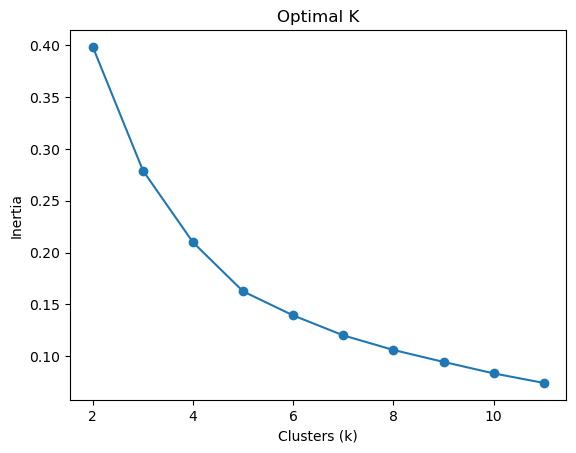

In [26]:
# calclulate intertia for each k value to find ideal k
inertia_list = []
k_range = range(2, 12)
# use kmeans.inertia_
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=11)
    kmeans.fit(reduced_datas[0])
    inertia_list.append(kmeans.inertia_)
# plot inertia values
plt.plot(k_range, inertia_list, marker='o')
plt.xlabel('Clusters (k)')
plt.ylabel('Inertia')
plt.title('Optimal K')
plt.show()

/Users/mayaellis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayaellis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayaellis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mayaellis/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

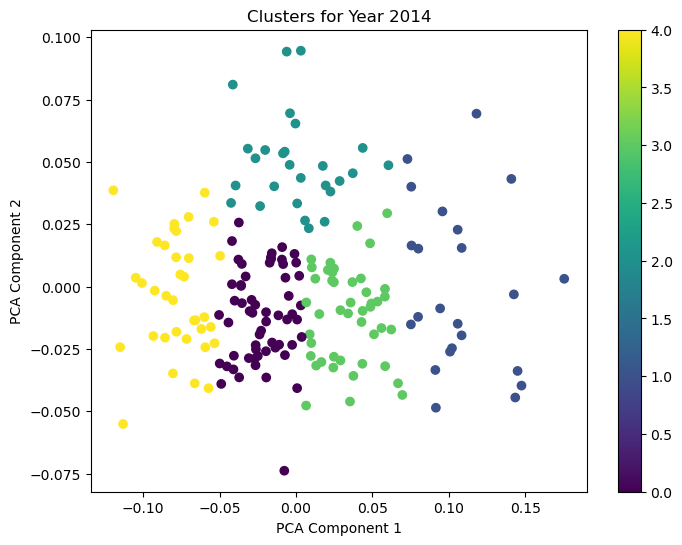

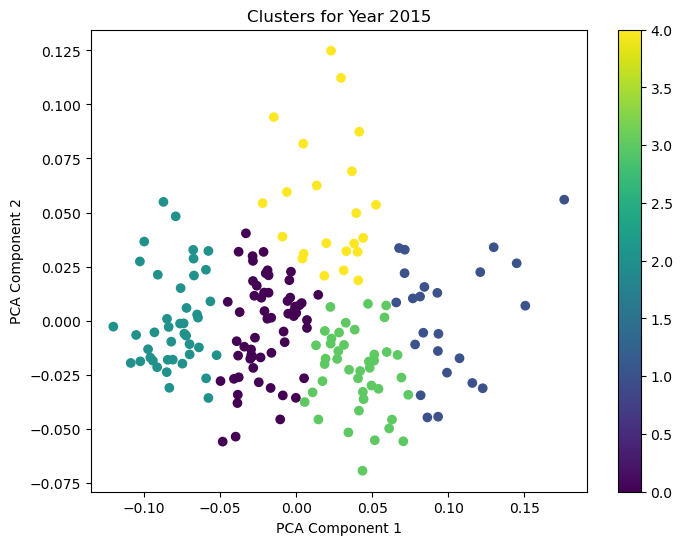

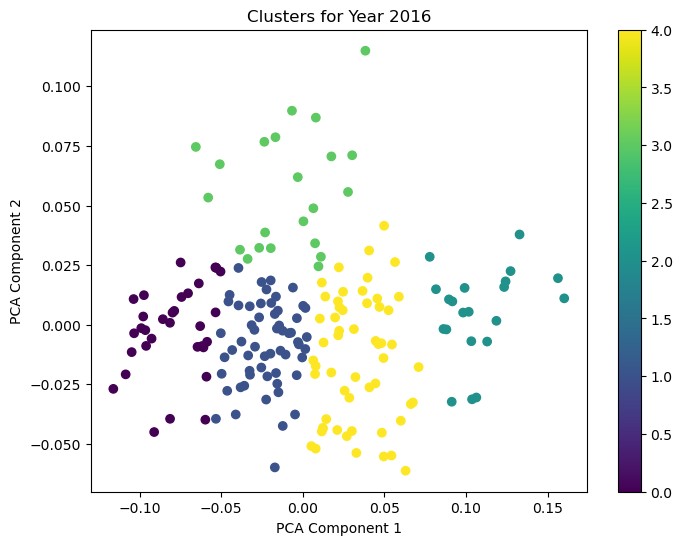

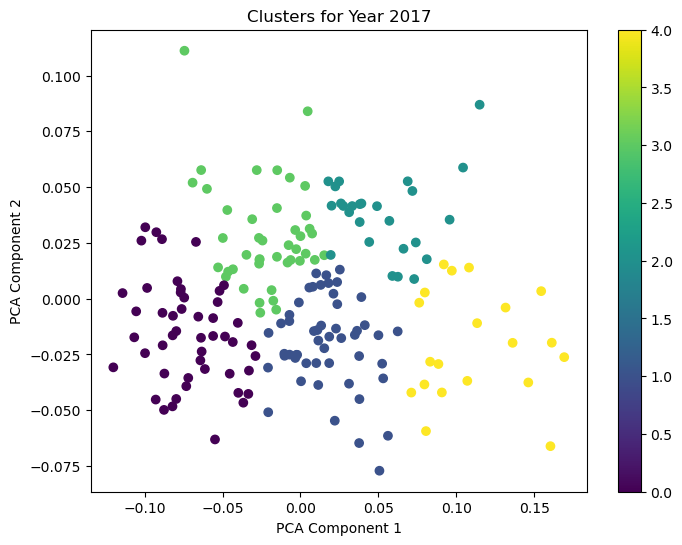

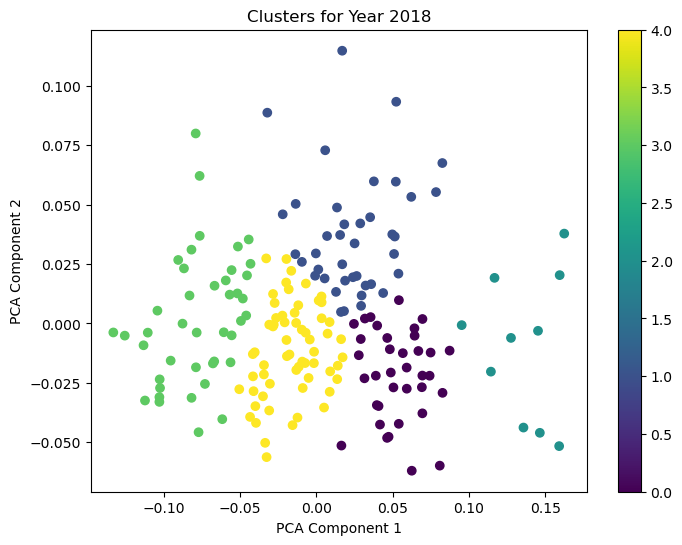

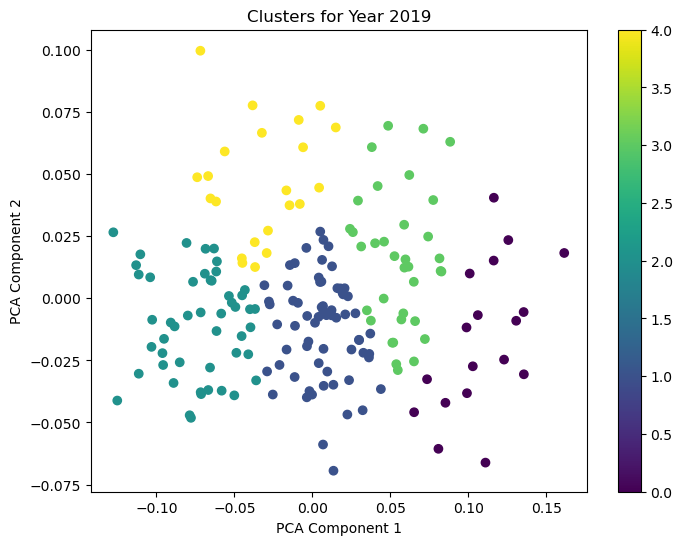

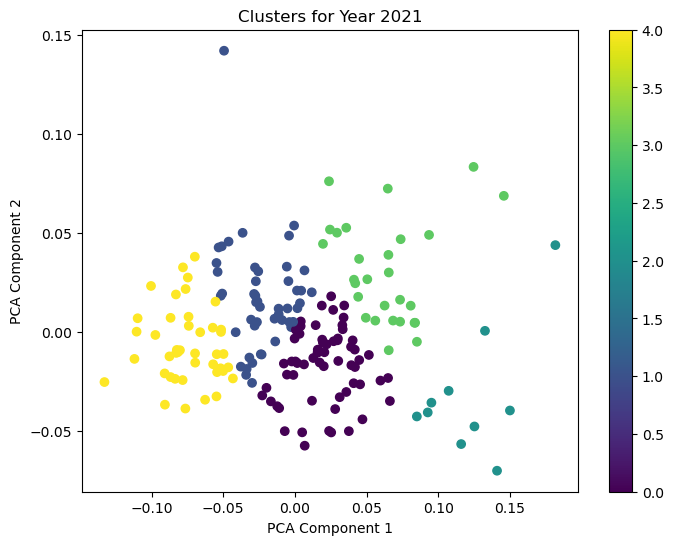

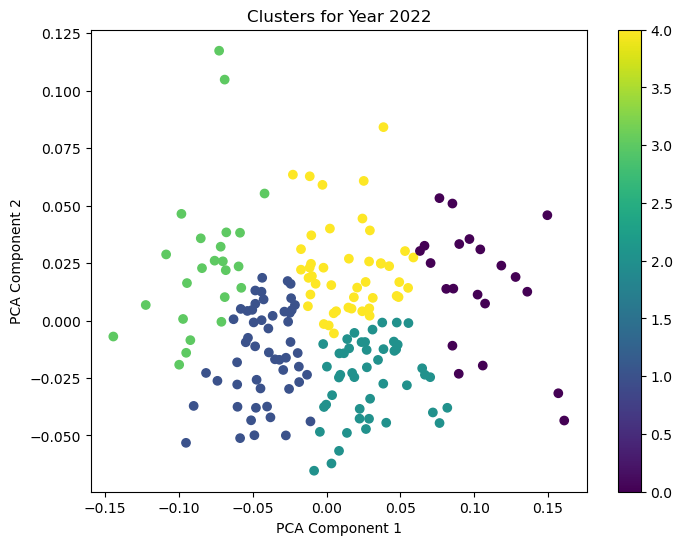

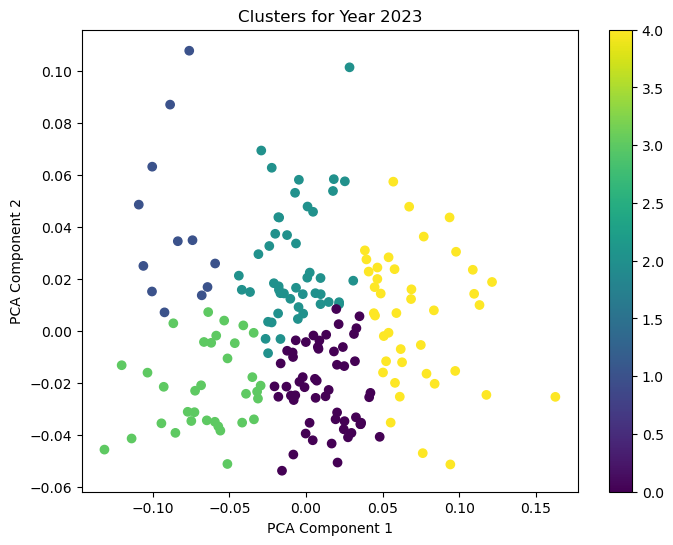

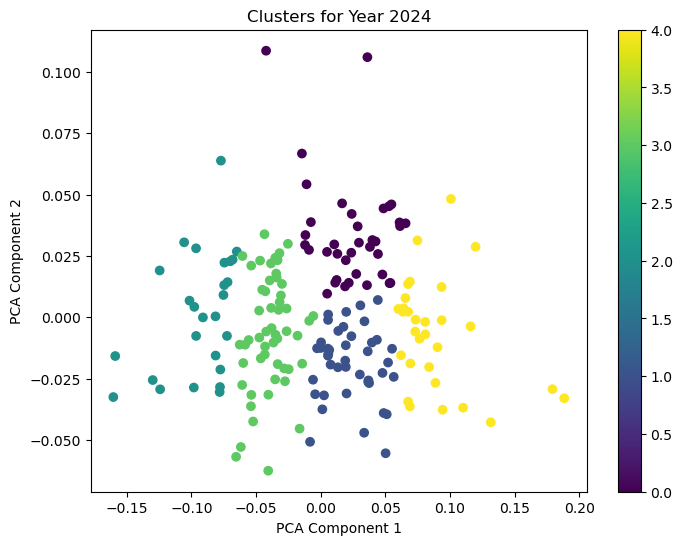

,Unnamed: 0_Store,Rk_2014,Player_2014,Age_2014,Team_2014,Lg_2014,WAR_2014,G_2014,PA_2014,AB_2014,...,cluster_2014,cluster_2015,cluster_2016,cluster_2017,cluster_2018,cluster_2019,cluster_2021,cluster_2022,cluster_2023,cluster_2024
0,NaN,1.0,Ian Kinsler,32.0,DET,AL,5.1,161.0,726.0,684.0,...,4,0,4,3,3,4,1,1,4,1
1,NaN,2.0,Nick Markakis*,30.0,BAL,AL,1.9,155.0,710.0,642.0,...,4,4,0,0,4,2,4,3,4,0
2,NaN,3.0,Matt Carpenter*,28.0,STL,NL,2.9,158.0,709.0,595.0,...,2,3,1,0,3,3,1,1,4,0
3,NaN,4.0,Freddie Freeman*,24.0,ATL,NL,3.0,162.0,708.0,607.0,...,2,0,0,0,3,3,1,1,4,4
4,NaN,5.0,Hunter Pence,31.0,SFG,NL,4.0,162.0,708.0,650.0,...,0,4,0,3,4,4,4,1,2,0


In [28]:
# use k=5 for kmeans clustering
clustered_data = []
for reduced_data in reduced_datas:
    kmeans = KMeans(n_clusters=5, random_state=11)
    kmeans.fit(reduced_data)
    labels = kmeans.labels_
    clustered_data.append(labels)
# plot each year's kmeans clustering
for i, year in enumerate(years):
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_datas[i][:, 0], reduced_datas[i][:, 1], c=clustered_data[i], cmap='viridis')
    plt.title(f"Clusters for Year {year}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar()
    plt.show()
# add the cluster number for each player to the df
for i, year in enumerate(years):
    year_columns = [f'SO_pct_{year}', f'BB_pct_{year}', f'HR_pct_{year}']
    df[f'cluster_{year}'] = clustered_data[i]

df.head()

In [29]:
for year in years:
    year_columns = [f'SO_pct_{year}', f'BB_pct_{year}', f'HR_pct_{year}']
    # set cluster_column to specific year
    cluster_column = f'cluster_{year}'
    # groups values by cluster, finds mean and size of cluster
    cluster_means = df.groupby(cluster_column)[year_columns].mean()
    cluster_sizes = df.groupby(cluster_column).size()
    # print values
    print(f"Year: {year}")
    print("Number of players in each cluster:")
    print(cluster_sizes)
    print("---------")
    # iterate through the mean value of each cluster
    for cluster_num, cluster_mean in cluster_means.iterrows():
        cluster_data = df[df[cluster_column] == cluster_num]
        # get euclidean dist between each player and the cluster mean
        distances = np.linalg.norm(cluster_data[year_columns].values - cluster_mean.values, axis=1)
        # find index of the closest player and get their data
        closest_player_index = distances.argmin()
        closest_player = cluster_data.iloc[closest_player_index]
        # sum their stats (so, bb, hr)
        sum_stats = closest_player[year_columns[0]] + closest_player[year_columns[1]] + closest_player[year_columns[2]]
        # print stats, year, cluster, player
        print(f"Year: {year}, Cluster: {cluster_num}")
        print(f"Mean Player: {closest_player['Player_' + str(year)]}")
        print(f"Stats: SO_pct={closest_player[year_columns[0]]}, "
              f"BB_pct={closest_player[year_columns[1]]}, HR_pct={closest_player[year_columns[2]]}")
        print(f"Sum of Stats: {sum_stats}")
        print("----------")

Year: 2014
Number of players in each cluster:
cluster_2014
0    59
1    23
2    27
3    45
4    35
dtype: int64
---------
Year: 2014, Cluster: 0
Mean Player: Kendrys Morales#
Stats: SO_pct=0.16957605985037408, BB_pct=0.06733167082294264, HR_pct=0.0199501246882793
Sum of Stats: 0.256857855361596
----------
Year: 2014, Cluster: 1
Mean Player: Jason Castro*
Stats: SO_pct=0.294921875, BB_pct=0.06640625, HR_pct=0.02734375
Sum of Stats: 0.388671875
----------
Year: 2014, Cluster: 2
Mean Player: Brian Dozier
Stats: SO_pct=0.18246110325318246, BB_pct=0.12588401697312587, HR_pct=0.03253182461103253
Sum of Stats: 0.3408769448373409
----------
Year: 2014, Cluster: 3
Mean Player: Allen Craig
Stats: SO_pct=0.22376237623762377, BB_pct=0.06930693069306931, HR_pct=0.015841584158415842
Sum of Stats: 0.30891089108910896
----------
Year: 2014, Cluster: 4
Mean Player: Yunel Escobar
Stats: SO_pct=0.11342155009451796, BB_pct=0.08128544423440454, HR_pct=0.013232514177693762
Sum of Stats: 0.20793950850661624


In [32]:
three_outcome_counts = []
# iterate through years and use so, bb, and hr columns
for year in years:
    year_columns = [f'SO_pct_{year}', f'BB_pct_{year}', f'HR_pct_{year}']
    cluster_column = f'cluster_{year}'
    # group values by cluster and find mean
    cluster_means = df.groupby(cluster_column)[year_columns].mean()
    # store sum of stats
    cluster_means['Sum_of_Stats'] = cluster_means.sum(axis=1)
    # find cluster with highest sum (3 outcome batters)
    max_cluster = cluster_means['Sum_of_Stats'].idxmax()
    # label 3 outcome batters
    df.loc[df[cluster_column] == max_cluster, f'label_{year}'] = "3 Outcome Batters"
    # count number of 3 outcome batters
    count = df[df[cluster_column] == max_cluster].shape[0]
    # count rbi for 3 outcome batters
    total_runs = df[df[cluster_column] == max_cluster][f'RBI_{year}'].sum()
    three_outcome_counts.append({"Year": year, "Cluster": max_cluster, "Player Count": count, "Total Runs Batted In": total_runs})
# store in new df
three_outcome_df = pd.DataFrame(three_outcome_counts)
# print values
print("3 Outcome Batters per Year:")
print(three_outcome_df)

3 Outcome Batters per Year:
   Year  Cluster  Player Count  Total Runs Batted In
0  2014        1            23                1255.0
1  2015        1            24                1509.0
2  2016        2            21                1050.0
3  2017        4            20                1155.0
4  2018        2            10                 506.0
5  2019        0            18                 932.0
6  2021        2            10                 570.0
7  2022        0            21                1045.0
8  2023        1            12                 867.0
9  2024        2            26                1550.0


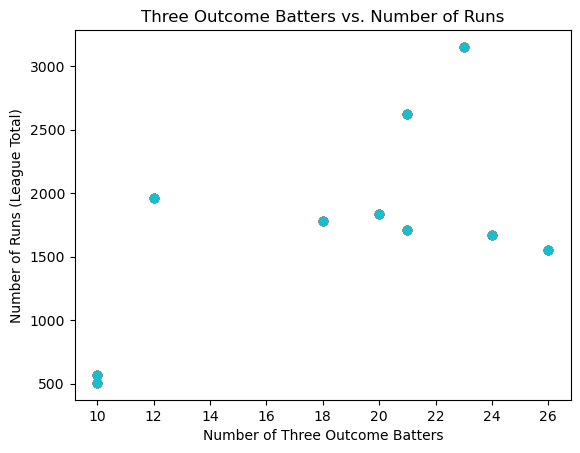

In [34]:
# plot total runs vs number of 3 outcome batters for each year
run_tot_by_year = []
# iterate through years and find cluster means and sums as previous
for year in years:
    cluster_column = f'cluster_{year}'
    cluster_means = df.groupby(cluster_column)[year_columns].mean()
    cluster_means['Sum_of_Stats'] = cluster_means.sum(axis=1)
    max_cluster = cluster_means['Sum_of_Stats'].idxmax()
    total_runs = df[df[cluster_column] == max_cluster][f'RBI_{year}'].sum()
    run_tot_by_year.append(total_runs)
# plot a graph containing all years
for year in years:
    plt.title("Three Outcome Batters vs. Number of Runs")
    plt.xlabel("Number of Three Outcome Batters")
    plt.ylabel("Number of Runs (League Total)")
    plt.scatter(three_outcome_df['Player Count'], run_tot_by_year)